In [1]:
%reset -f
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Use the MNRAS style for matching fonts
import starwinds_magnetogram
from starwinds_magnetogram import plot_zdi
from starwinds_magnetogram import converter
from starwinds_magnetogram import reader_writer
from starwinds_magnetogram import zdi_magnetogram
from starwinds_magnetogram.geometry import ZdiGeometry
from starwinds_magnetogram import plots

matplotlib.style.use('starwinds_magnetogram.mnras')

# Column width and text width in inches as reported by LaTeX
mnras_single_width_in = 3.3209
mnras_double_width_in = 6.9738

In [2]:
def draw(lz, ax, cax):
    zg = ZdiGeometry()

    polar_centers, azimuth_centers = zg.centers()
    polar_corners, azimuth_corners = zg.corners()

    field_centers = lz.get_radial_field(polar_centers, azimuth_centers)

    img, zero_contour = plots.plot_magnetic_field(ax, polar_centers, azimuth_centers, 
                                               field_centers,  
                                               polar_corners=polar_corners, 
                                               azimuth_corners=azimuth_corners)


    img.set_rasterized(True)

    _maxabs = np.max(np.abs(field_centers)) * 1.05
    img.set_clim(-_maxabs, _maxabs)
    
    cb = plt.colorbar(img, cax=cax)

    range_ = plots.add_extrema(polar_centers, azimuth_centers, field_centers, ax, 
                      legend_str="Hello", markers="ox", color='white')
    
    plots.add_contours(polar_centers, azimuth_centers, 
                       field_centers, ax, legend_str="B_r", cb=cb)

    cb.lines[-1].set_linestyle('dashed')

    cb.ax.plot(cb.ax.get_xlim(), [0, 0], 'k-') # my data is between 0 and 1

    cb.ax.plot(np.mean(cb.ax.get_xlim()),
               np.max(field_centers), color='w', marker='o', 
               linestyle="none", markersize=2, fillstyle='none')
    cb.ax.plot(np.mean(cb.ax.get_xlim()),
               np.min(field_centers), color='w', marker='x', 
               linestyle="none", markersize=2, fillstyle='none')

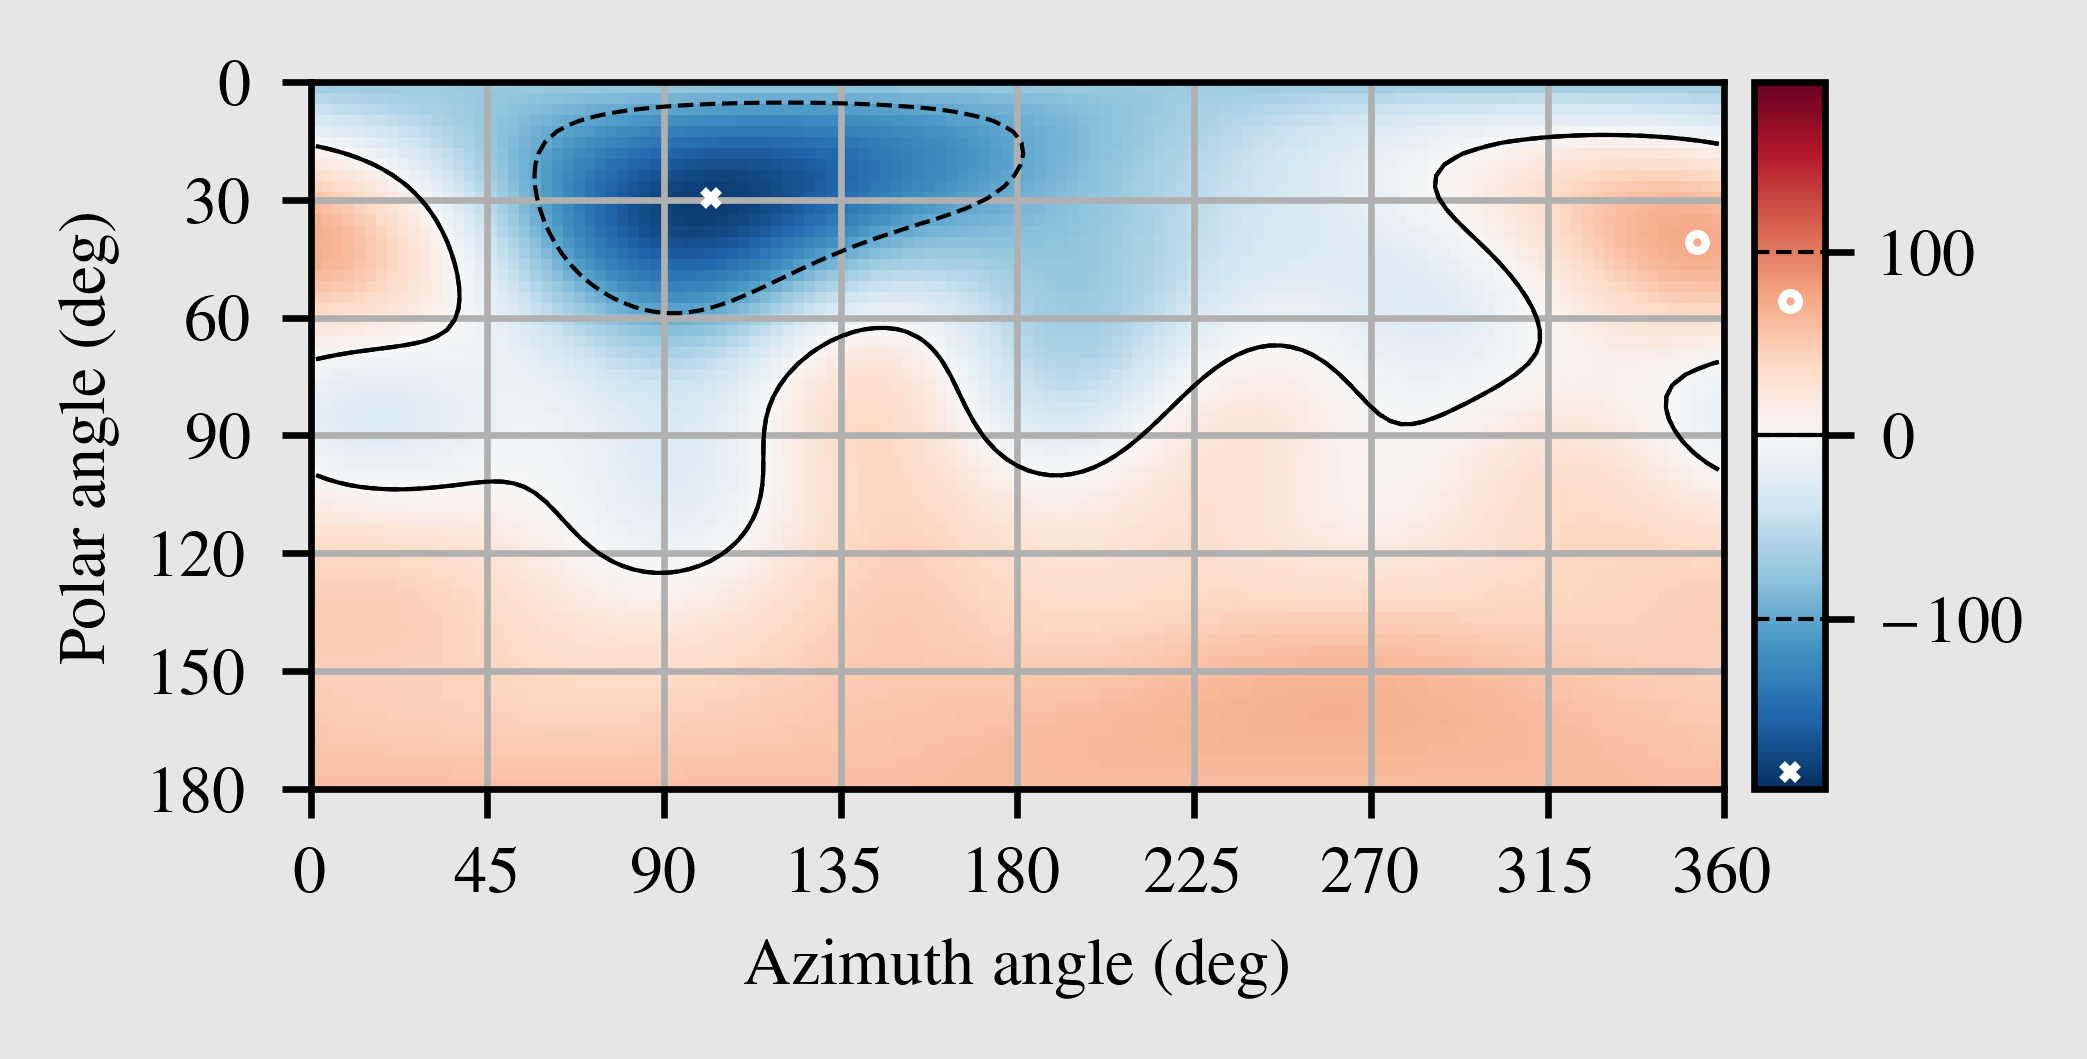

In [3]:
fig, ax = plt.subplots()

# Create color bar axis following https://stackoverflow.com/a/18195921/3198895
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)


coefficients = reader_writer.read_magnetogram_file("zdi-magnetogram.dat")
lz = zdi_magnetogram.from_coefficients(coefficients)

draw(lz, ax, cax=cax)
fig.set_facecolor((.9, .9, .9))  # To better see edges of .pdf file.

plt.savefig("magnetogram.png")


plt.savefig("default-boundaries.pdf")
# To create a .pdf file these 'magic' numbers are picked by eye, as the .pdf file 
# bondaries are not matched to those of the .png file (matplotlib feature request)!
fig.set_figheight(0.48 * fig.get_figwidth())

# Reducing 'left' moves content to the right
# Reducing 'right' moves content to the left
plt.subplots_adjust(left=.13, right=.89)

# Reducing 'top' moves content down
# Reducing 'bottom' moves content up?
plt.subplots_adjust(top=1.15, bottom=.05)
plt.savefig("fitted-boundaries.pdf")


In [4]:
# !open magnetogram.png default-boundaries.pdf fitted-boundaries.pdf